<a href="https://colab.research.google.com/github/marcelounb/tensorflow_udacity/blob/master/01_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import math
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.utils import np_utils

# Imports for the CNN
from keras.layers import Flatten 
from keras.layers.convolutional import Convolution2D 
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K 
K.set_image_data_format('channels_first')

In [2]:
import tensorflow as tf
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# My import of the fashion mnist dataset


In [3]:
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

In [4]:
X_train.shape, "----", X_test.shape

((60000, 28, 28), '----', (10000, 28, 28))

In [5]:
y_train.shape, "----", y_test.shape

((60000,), '----', (10000,))

In [6]:
from random import randrange
print (randrange(0,60000))

31620


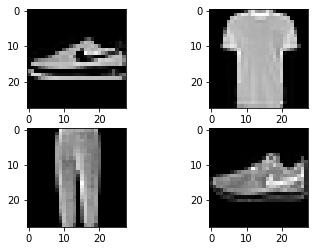

In [7]:
# plot 4 images as gray scale 
plt.subplot(221) 
plt.imshow(X_train[randrange(0,60000)], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(222) 
plt.imshow(X_train[randrange(0,60000)], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(223) 
plt.imshow(X_train[randrange(0,60000)], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(224) 
plt.imshow(X_train[randrange(0,60000)], cmap=plt.get_cmap( 'gray' ))
# show the plot 
plt.show()

# Udacity Tensorflow import of the fashion mnist dataset

In [8]:
import tensorflow_datasets as tfds
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [10]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [11]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

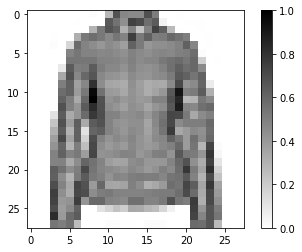

In [15]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

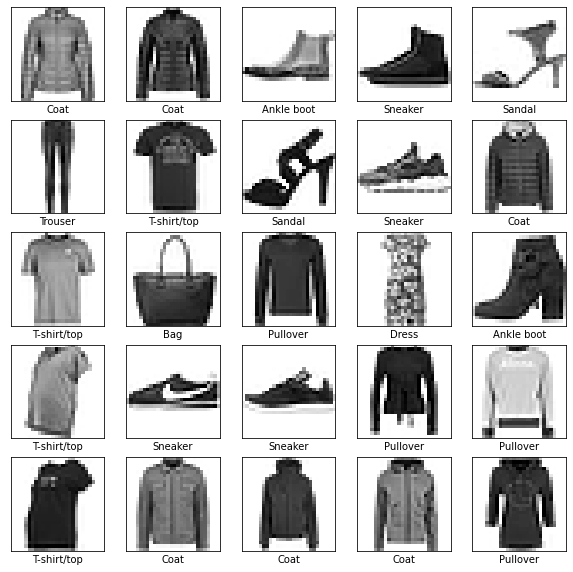

In [19]:
plt.figure(figsize=(10,10))
i = 0

for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

# Building the model

In [22]:
def baseline_model(): 
  # create model 
  model = Sequential() 
  model.add(Flatten(input_shape=(28,28,1)))
  model.add(Dense(128, activation= 'relu' )) 
  model.add(Dense(10, activation= 'softmax' )) 

  # Compile model 
  model.compile(loss= 'sparse_categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ]) 
  return model

In [23]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [24]:
# build the model 
model = baseline_model() 
# Fit the model 
history = model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4917 - accuracy: 0.8265
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3690 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3378 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3144 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2915 - accuracy: 0.8931


In [25]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3480 - accuracy: 0.8740
Accuracy on test dataset: 0.8740000128746033


# Make predictions and explore
With the model trained, we can use it to make predictions about some images

In [26]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [27]:
predictions.shape

(32, 10)

In [28]:
predictions[0]

array([1.35048767e-05, 3.20383879e-05, 7.59535702e-03, 1.66167399e-06,
       9.77816343e-01, 1.39954341e-08, 1.45392865e-02, 1.96287830e-09,
       1.91877189e-06, 4.01076106e-09], dtype=float32)

In [29]:
np.argmax(predictions[0])

4

In [30]:
test_labels[0]

4

In [32]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

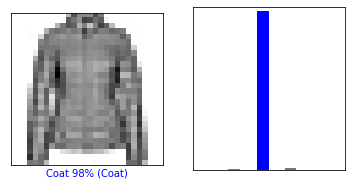

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

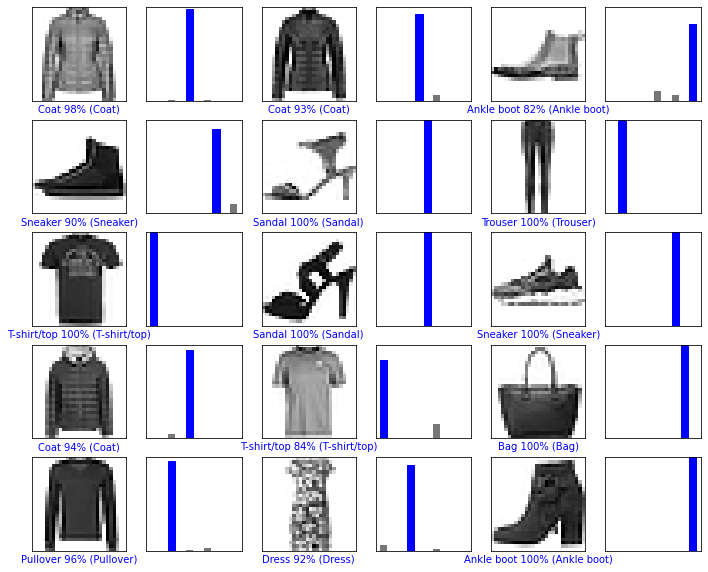

In [34]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [35]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [36]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


Now predict the image:

In [37]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.3504890e-05 3.2038388e-05 7.5953677e-03 1.6616773e-06 9.7781634e-01
  1.3995407e-08 1.4539293e-02 1.9628783e-09 1.9187758e-06 4.0107611e-09]]


In [38]:
np.argmax(predictions_single[0])

4

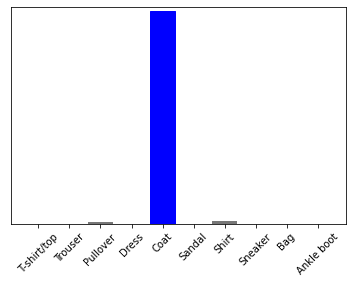

In [39]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)